In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# homework1 remove duplicates value
my_array = np.array([1,2,2,3,4,3,5,1])
array = np.unique(my_array)
print(array)

[1 2 2 3 4 3 5 1]


In [10]:
# homework2 determine acceptance rate of requests SQL
# SELECT 100%*SUM(accepted.time)/SUM(request.time) AS rate
# FROM friend_accepted AS accepted
# INNOR JOIN friend_request AS request
#    ON request.requester_id = accepted.requestor_id
#    AND request.sent_to_id = accepted.acceptor_id
# GROUP BY 1

In [191]:
# homework2 determine acceptance rate of requests Python
# Pandas Cheat Sheet pandas/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
# rate = sum(accept) / sum(request)
merged = pd.merge(friend_accepted, friend_request, how='inner',
                  on=['requester_id','requestor_id'])
rate = sum(merged[0])/sum(merged[1])

In [14]:
# homework3 identify issuer

In [15]:
CC = ['4175004175004172', '4917491749174917', 
             '346416800707698', '376416800707698', 
             '37641680070769832112','36641680070769', 
             '54545641680070769']

if (CC[0] == '4' and len(CC) == 16):
    if (CC[0:4]=='4026'or'4405'or'4508'or'4844'or'4913'or'4917'
       or (CC[0:6]=='417500')):
        print("VISAELECTRON")
    else:
        print("VISA")
elif (CC[0:2]=='34'or'37' and len(CC) == 15):
    print("AMEX")
elif (CC[0:2]== '36' and len(CC) == 14):
    print("Diners Club")
else:
    print("UNKNOWN")
    

In [3]:
# homework4 Print Cumulative Time Series
# read data
file_location = "/Users/jiao/Downloads/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

In [4]:
import datetime
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [5]:
#red_id equals to experience_id=12624548
#blue_id equals to experience_id=12624549
np.unique(my_data["experiment_id"])
red_id = np.unique(my_data["experiment_id"])[0]
blue_id = np.unique(my_data["experiment_id"])[1]

# subset the data
red_data = my_data[['date','spend_usd','country','vertical']][my_data.experiment_id == red_id]
blue_data = my_data[['date','spend_usd','country','vertical']][my_data.experiment_id == blue_id]
red_test = np.cumsum(red_data.groupby('date')['spend_usd'].sum())
red_test.head(5)

date
2017-04-01     84017.341822
2017-04-02    137448.866601
2017-04-03    190557.548939
2017-04-04    236190.035518
2017-04-05    287575.193811
Name: spend_usd, dtype: float64

In [6]:
blue_test = np.cumsum(blue_data.groupby('date')['spend_usd'].sum())
blue_test.head()

date
2017-04-01     79698.149014
2017-04-02    135650.086580
2017-04-03    183489.384696
2017-04-04    229006.213561
2017-04-05    283314.758617
Name: spend_usd, dtype: float64

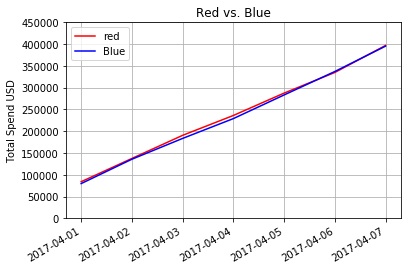

In [8]:
# plot total differences between red and blue
fig, ax = plt.subplots()
ax.plot(red_test, color="red", label="red")
ax.plot(blue_test, color="blue", label = "blue")
ax.set_ylim(0,450000)
ax.set_title("Red vs. Blue")
ax.set_ylabel("Total Spend USD")
ax.grid(True, which="both")
ax.legend().get_texts()[0].set_text("Red")
ax.legend().get_texts()[1].set_text("Blue")
plt.gcf().autofmt_xdate()

In [64]:
# define CumulativeTimeSeries() with three parameters: experiment_id, country, and vertical
# filter with country and vertical
def CumulativeTimeSeries(my_data, experiment_id, country, vertical):
    table = my_data[['date', 'spend_usd']][(my_data.experiment_id == experiment_id) 
                                           & (my_data.country == country) 
                                           & (my_data.vertical == vertical)]
    data = np.cumsum(table.groupby('date')['spend_usd'].sum())
    total_revenue = my_data.spend_usd.sum() 
    return(data, total_revenue)
# for example, set country = JP, vertical = ANDROID_APPS
red = CumulativeTimeSeries(my_data, red_id, 'JP', 'ANDROID_APPS')
blue = CumulativeTimeSeries(my_data, blue_id, 'JP', 'ANDROID_APPS')

In [52]:
# define plot
def plot(experiment, control, country, vertical):
    fig, ax = plt.subplots()
    ax.plot(red_test, color="red", label="red")
    ax.plot(blue_test, color="blue", label = "blue")
    ax.set_ylim(0,450000)
    ax.set_title("Red vs. Blue")
    ax.set_ylabel("Total Spend USD")
    ax.grid(True, which="both")
    ax.legend().get_texts()[0].set_text("Experiment")
    ax.legend().get_texts()[1].set_text("Control")
    plt.gcf().autofmt_xdate()

In [65]:
# defint print series
def PrintCumulativeTimeSeries(my_data, experiment_id, country, vertical):
    my_data = my_data.sort_values("date")
    experiment = CumulativeTimeSeries(my_data, red_id, country, vertical)
    control = CumulativeTimeSeries(my_data, blue_id, country, vertical)
    plot(experiment, control, country, vertical)

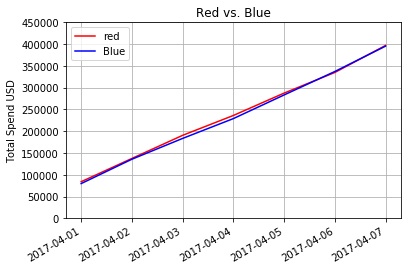

In [66]:
PrintCumulativeTimeSeries(my_data, [red_id, blue_id], 'US', 'ANDROID_APPS')
# Not sure if I call Print Method correctly